# PROYECTO FINAL

La empresa GoGreen Bikesharing, se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica, y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import datetime
import numpy as np

PREGUNTAS

¿en que momento del año se alquilan mas bicicletas?
Influye soleado o nubes?
Fin de semana o laborable?
los primeros y ultimos dias del mes hay mas reservas?
festivos aumenta las reservas?
la tempreatura a partir de la cual disminuye los alquileres  ->Punto ruptura
Punto maximo de alquiler
la temperatura alta influye al alquiler de espontaneos o habituales?
la humedad es un punto clave en algun momento? A partir de que punto de humedad bajan drasticamente las reservas?

fecha donde hay mas y menos reservas






In [3]:
df_bike = pd.read_csv("./bikes.csv", index_col=0)
df_bike.sample(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
545,546,30-06-2019,autumn,1,6,0,6,0,1,31.365000,34.37540,60.1250,10.791757,1455,4232,5687
49,50,19-02-2018,spring,0,2,0,6,0,1,16.365847,19.57020,18.7917,34.000021,532,1103,1635
268,269,26-09-2018,winter,0,9,0,1,1,2,26.615847,29.45210,84.8333,7.416900,684,3946,4630
564,565,19-07-2019,autumn,1,7,0,4,1,1,31.570000,35.73210,60.0417,11.083743,888,5703,6591
432,433,09-03-2019,spring,1,3,0,5,1,2,16.844153,19.85415,40.7083,27.791600,447,4122,4569
554,555,09-07-2019,autumn,1,7,0,1,1,2,29.144153,32.70270,68.3333,12.125325,998,5571,6569


In [4]:
df_bike.mnth.dtype

dtype('int64')

# limpieza string

In [10]:
df_bike.season.unique()

array(['spring', 'summer', 'autumn', 'winter'], dtype=object)

# duplicados

In [3]:
df_bike.duplicated().sum()

0

# Nulos

In [4]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_bike.shape

(730, 16)

In [6]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


# MINI EDA con cols Tª y Humedad - Laura

In [5]:
df_bike.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [14]:
df_lau = df_bike[['temp','atemp','hum']]

In [15]:
df_lau = df_lau.round(1)
df_lau

,temp,atemp,hum
0,14.1,18.2,80.6
1,14.9,17.7,69.6
2,8.1,9.5,43.7
3,8.2,10.6,59.0
4,9.3,11.5,43.7
...,...,...,...
725,10.4,11.3,65.3
726,10.4,12.8,59.0
727,10.4,12.1,75.3
728,10.5,11.6,48.3


In [16]:
df_lau.describe()

,temp,atemp,hum
count,730.000000,730.000000,730.000000
mean,20.319315,23.726438,62.764247
std,7.506701,8.149042,14.237901
min,2.400000,4.000000,0.000000
25%,13.800000,16.900000,52.000000
50%,20.450000,24.350000,62.650000
75%,26.900000,30.475000,73.000000
max,35.300000,42.000000,97.200000


In [30]:
df_temp = df_bike[['temp','atemp']]
df_temp

,temp,atemp
0,14.1,18.2
1,14.9,17.7
2,8.1,9.5
3,8.2,10.6
4,9.3,11.5
...,...,...
725,10.4,11.3
726,10.4,12.8
727,10.4,12.1
728,10.5,11.6


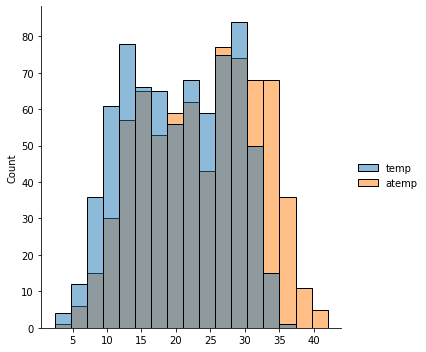

In [31]:
sns.displot(df_temp)

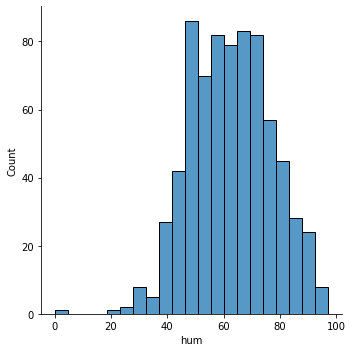

In [32]:
sns.displot(df_lau["hum"])

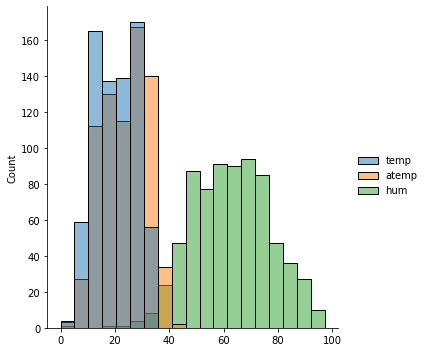

In [33]:
sns.displot(df_lau)

Hago un cut para hacer la temperaturas por intervalos

In [43]:
df_bike["temp_interval"] = pd.cut(df_bike["temp"], 5,labels = ["very_low", "low", "medium", "high", "very_high"], ordered=True)

In [45]:
df_bike["atemp_interval"] = pd.cut(df_bike["atemp"], 5,labels = ["very_low", "low", "medium", "high", "very_high"], ordered=True)

In [46]:
df_bike["hum_interval"] = pd.cut(df_bike["hum"], 5,labels = ["very_low", "low", "medium", "high", "very_high"], ordered=True)

In [62]:
df_bike.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_interval,temp_interval,hum_interval
0,1,01-01-2018,spring,0,1,0,6,0,2,14.1,18.2,80.6,10.749882,331,654,985,low,low,very_high
1,2,02-01-2018,spring,0,1,0,0,0,2,14.9,17.7,69.6,16.652113,131,670,801,low,low,high


Voy a agrupar por intervalo

In [64]:
df_interval = df_bike[["atemp_interval","temp_interval","hum_interval"]]
df_interval

,atemp_interval,temp_interval,hum_interval
0,low,low,very_high
1,low,low,high
2,very_low,very_low,medium
3,very_low,very_low,high
4,very_low,low,medium
...,...,...,...
725,very_low,low,high
726,low,low,high
727,low,low,high
728,very_low,low,medium


In [79]:
df_group_temp = df_bike.groupby(["temp_interval"]).agg({'cnt': ['sum']})

In [78]:
df_group_atemp = df_bike.groupby(["atemp_interval"]).agg({'cnt': ['sum']})

In [77]:
df_group_hum= df_bike.groupby(["hum_interval"]).agg({'cnt': ['sum']})
df_group_hum

,cnt
,sum
hum_interval,
very_low,2258
low,95327
medium,1224798
high,1595145
very_high,373317


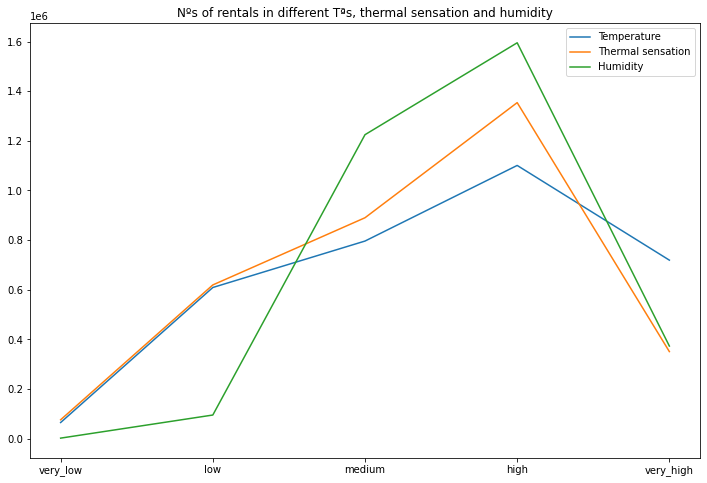

In [91]:
plt.figure(figsize=(12,8))
plt.plot(df_group_temp, label = "Temperature")
plt.plot(df_group_atemp, label = "Thermal sensation")
plt.plot(df_group_hum, label = "Humidity")
plt.title("Nºs of rentals in different Tªs, thermal sensation and humidity")
plt.legend()
plt.show()

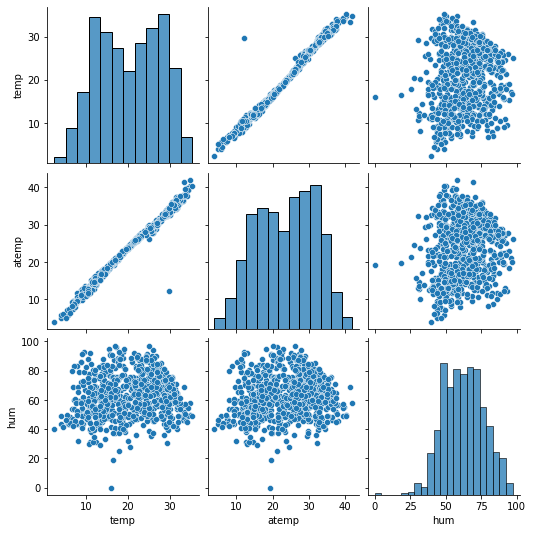

In [92]:
sns.pairplot(df_lau);

Se acercan bastante a la normal.

/tmp/ipykernel_1098/1109436254.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_lau.corr(), dtype=np.bool))


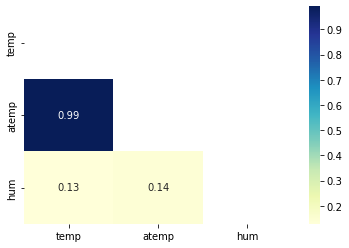

In [97]:
mask = np.triu(np.ones_like(df_lau.corr(), dtype=np.bool))
mask
sns.heatmap(df_lau.corr(),
            cmap = "YlGnBu", 
            mask = mask, # incorporamos la máscara en nuestro plot
           annot = True); 

Hay que elegir una de las variables, o temperatura o sensación térmica.

In [98]:
from scipy import stats

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene


In [101]:
df_lau["temp"].size

730

In [102]:
stats.shapiro(df_lau["temp"].sample(730))

ShapiroResult(statistic=0.9657878279685974, pvalue=4.954737575085799e-12)

In [103]:
# Transformación boxcox para luego
# df['median_house_value'], lambda_ajustada = stats.boxcox(df['median_house_value'])

# estandarización de spring